# COGS 118B - Final Project

# Spotify Songs

## Group members

- Daniel Kong
- Jonathan Ito
- Yuri Reyes
- Larry Nguyen
- Fatima Dong

# Abstract 
Our goal is to see if we can accurately predict songs' genres using text analysis on the lyrics. The data, in addition to the lyrics of top spotify songs, represents different aspects of a song, such as how many words are spoken, what kinds of instrumentals, or the energy levels. All of these said columns have decimal values that correspond to different levels for each song aspect. For example, a higher value (closer to 1) on the speechiness column indicates more spoken words. Regarding the lyrics, we will be performing text analysis, we will be performing PCA on the other labels that represent aspects of a song and see which ones correlate the strongest to a song's genre. We will measure our performance/success using clustering to see how accurate our predictions of song genres are.

# Background

Some critical information that is necessary for this project is what are we using to classify what genre a song belongs to. As MoodMedia states, there hundreds if not thousands of musical genres that exist throughout the world <a name ="source1"></a>[<sup>[1]</sup>](#source1note). With all of these genres, it could be overwhelming to attempt to put a specific genre to any song. In this case, it is useful to pick out the biggest genres which is what MoodMedia did. They compiled a small list of genres that play a large influence to how music is today. This list comprises of genres like pop, jazz, hip hop, classical, country, etc. This information is useful to us as it would serve as a foundation for us as we begin our project.

In terms of using machine learning to classify music, there has been past projects that aimed to complete this very task that we set out to do. Some attempt this by utilizing the wavelengths of the song itself to determine the genre. These projects start off with making general genres for classification. Then, they set the criteria for each genre for the machine to use when labelling a song with its genre. Next comes the identification portion. This implementation is different project to project. Some projects, like the one Despois did, take slices out of the song and try to determine the song after voting from multiple slices of the song <a name ="source2"></a>[<sup>[2]</sup>](#source2note). Others, like Haggblade, used the approach of testing multiple machine learning algorithms like k-Nearest Neighbors, k-Means, Multi-class support vector machine, and neural networks <a name ="source3"></a>[<sup>[3]</sup>](#source3note). From this paper, it seems like SVM and neural networks performed the best with neural networks performing outstandingly better than the rest of the methods. 

Additionally, there are also projects that try to classify songs based off their lyrics. Boonyanit and Dahl's approach for this problem was to use a Long Short-Term Memory approach. When using this approach, their best model achieved an accuracy of 68% <a name ="source4"></a>[<sup>[4]</sup>](#source4note). One approach they compared themselves to is neural networks used in Rajanna et al's paper which used a three layer neural network and achieved an accuracy of 74%<a name ="source5"></a>[<sup>[5]</sup>](#source5note). Another approach from Kumar et al achieved an accuracy of 80.16%, but is limited to only 4 genres<a name ="source6"></a>[<sup>[6]</sup>](#source6note). These projects are important as we can see what works well, what doesn't, and any possible limitations that we might have to overcome/face with our approach.

# Problem Statement

The problem our group is solving is determing music genres given the lyrics of a song as well as other values such as its tempo, key, loudness, etc. This will involve using text/sentiment analysis on the lyrics and clustering with the other defined variables determine the different genres. Each song can be represented by a vector of some dimension, depending on how many variables are used. The problem to be solved is clustering these datapoints into discernable genres. Genres can be closer to some than others, and our clusters should reflect those nuances. Additionally, some songs may belong to multiple genres, so these songs will be harder to cluster as well. 

# Data

A potential dataset we can use can be found at this link: https://www.kaggle.com/datasets/imuhammad/audio-features-and-lyrics-of-spotify-songs. This dataset contains 18454 observations and 25 variables. Each observation has an id, the song name, artist, popularity, and album, the lyrics of the song, as well as many aspects of the song like its danceability, energy, key, tempo, etc. The critical values in this dataset are the track name, artist, lyrics, and the different song characteristics. These are the variables that we will be using for our clustering. The track name, artist, and lyrics are all represented as strings. The song characteristics (tempo, key, valence, etc) are represented as floats (numbers). For all of the string values, we will likely need to make them uniform, such that they're all lowercase. We will also probably only want to look at songs that are in English. We will have to run text analysis on the song lyrics and categorize them, and then we can one-hot-encode those categories for our clustering. We will likely have to standardize the float values as some of the values for different variables are on different orders of magnitude, which can influence our result.

# Proposed Solution

For this project, we plan to retrieve Spotify songs data and clean it. Handling missing values and ensuring consistency throughout the data if required. For the lyrics, we plan to extract relevant features from the lyrics to help record meaning. One way we can go about this is by using techniques like term frequency-inverse document frequency (TF-IDF). Another way could be by word embedding using Word2Vec or GloVe. We plan to utilize a clustering algorithm like hierarchical clustering to group sounds based on the categorizes we plan to discuss (e.g. danceability). 

As we're still in the early stages of the gorup project, not all details are set but it is likely that we will be using Python with libraries such as scikit-learn for clustering. Vizualization tools such as MAthplotlib or Seaborn will help us present our findings efficiently. For the lyrics, we will consider embedding models such as Word2Vec or transformer-based models like BERT.

# Evaluation Metrics

As mentioned in the problem statement, we intend to do a classification of music genres based on sentiment analysis of lyrics and clustering based on features of each song, such as tempo, energy, etc. 

Our classification's evaluation metric will be on precision, recall, and F-1 scores<a name ="source7"></a>[<sup>[7]</sup>](#source7note). Based on our data, there are already genres included, so we can check our classification for actual true positives. Precision will be used to compare the true positives (tp) and false positives (fp), which is in this formula $\frac{tp}{tp + fp}$. Recall will be used to compare the true positives and false negative(fn), which is in this formula $\frac{tp}{tp + fn}$. As for F-1 scores, it provides a balanced measure based on precision and recall, which is shown in this formula: $\frac{2 * recall * precision}{recall + precision}$. The reason why we decided not to use accuracy as an evaluation metric is because we want to take the data imbalance into consideration. 

Our clustering's evaluation metric will be on silhouette score. The silhouette score is a measure on how similar a sample is close to its own cluster compared to other clusters. The score is bounded by [-1,1], where a value of -1 means incorrect clustering, score 0 means overlapping clusters, and score 1 means highly dense clustering. The formula would be $\frac{b-a}{max(a,b)}$, where $a$ represents the mean distance between a sample and all the other points in the same class and $b$ represents the mean distance between a sample and all the other points in the next nearest cluster.

# Results

# Cleaning and Standardizing the Data

- Making sure everything is uniform and up to standard for analysis

In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Some useful imports

import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import pandas as pd
import string

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import rand_score, adjusted_rand_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.pipeline import Pipeline

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import word_tokenize
import nltk.data
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/fatimadong/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/fatimadong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
data = pd.read_csv("spotify_songs.csv")


Drop the columns that are not necessary to analyze


In [5]:
cols_to_drop = ["track_id", "playlist_id", "track_album_id"]
data = data.drop(cols_to_drop, axis = 1)

In [6]:
data.columns

Index(['track_name', 'track_artist', 'lyrics', 'track_popularity',
       'track_album_name', 'track_album_release_date', 'playlist_name',
       'playlist_genre', 'playlist_subgenre', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'language'],
      dtype='object')

### Standardize the Data

Standardizing the data in our case is making the data easier to read and the dataset more understandable. Our methods of standardizing includes:

- Change the length of the songs from milliseconds into format that is in  Minutes: seconds
- Change the mode values so that 1 reads as "major" and 0 reads as "minor" as the dataset creators describe
- Change the key values of tracks to strings of their actual keys rather than integers that represent the keys
- Z-score numerical data to make all data be on the same order of magnitude.

In [7]:
data.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000
mean,42.438821,0.644066,0.692289,5.342094,-6.769159,0.580525,0.106192,0.175348,0.051216,0.189593,0.520598,120.812167,230319.306763
std,24.616740,0.150071,0.180635,3.613121,2.920757,0.493487,0.102291,0.217795,0.168263,0.153751,0.228716,27.586424,57255.086685
min,0.000000,0.098500,0.016700,0.000000,-34.283000,0.000000,0.022400,0.000001,0.000000,0.009360,0.000010,37.114000,31893.000000
25%,24.000000,0.546000,0.573000,2.000000,-8.249000,0.000000,0.039700,0.016100,0.000000,0.092700,0.345000,98.856000,193230.250000
50%,48.000000,0.660000,0.715000,6.000000,-6.227000,1.000000,0.060300,0.081900,0.000009,0.128000,0.522000,120.045000,221340.000000
75%,62.000000,0.755000,0.835000,9.000000,-4.719000,1.000000,0.130000,0.254000,0.001720,0.246000,0.700000,135.984000,258078.250000
max,100.000000,0.979000,1.000000,11.000000,1.275000,1.000000,0.918000,0.992000,0.987000,0.996000,0.991000,214.047000,517810.000000


In [8]:
type(data['key'].iloc[0])

numpy.int64

In [9]:
def standardize_duration(duration):
    total_seconds = duration / 1000
    minutes = int(total_seconds / 60)
    seconds = int(total_seconds % 60)
    str_seconds = str(seconds)
    if len(str_seconds) < 2:
        str_seconds = "0" + str_seconds
    return str(minutes) + ":" + str_seconds

def standardize_mode(mode):
    if (mode == 1):
        return 'Major'
    else:
        return 'minor'

def standardize_keys(key):
    key_dict = {0: 'C', 1: 'C sharp / D minor', 2: 'D', 3: 'E minor / D sharp', 4: 'E', 5: 'F', 6: 'F Sharp / G Flat', 7: 'G', 8: 'G Sharp / A Flat', 9: 'A', 10: 'A Sharp / B Flat', 11: 'B'}
    return key_dict[key]

In [10]:
data = data.rename(columns={"duration_ms": "track_length"})
data['track_length'] = data['track_length'].apply(standardize_duration)
data['key'] = data['key'].apply(standardize_keys)

In [11]:
data['mode'] = data['mode'].apply(standardize_mode)

In [12]:
#Use this cell to apply the standardize_key() function to the respective column

In [13]:
data.head()

,track_name,track_artist,lyrics,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_length,language
0,Pangarap,Barbie's Cradle,Minsan pa Nang ako'y napalingon Hindi ko alam ...,41,Trip,2001-01-01,Pinoy Classic Rock,rock,classic rock,0.682,...,-10.068,Major,0.0236,0.27900,0.01170,0.0887,0.566,97.091,3:55,tl
1,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",28,Love & Loss,2017-11-21,Hard Rock Workout,rock,hard rock,0.303,...,-4.739,Major,0.0442,0.01170,0.00994,0.3470,0.404,135.225,6:13,en
2,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,Gold,2005-01-01,"Back in the day - R&B, New Jack Swing, Swingbe...",r&b,new jack swing,0.845,...,-7.504,minor,0.2160,0.00432,0.00723,0.4890,0.650,111.904,4:22,en
3,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,41,CeeLo's Magic Moment,2012-10-29,Christmas Soul,r&b,neo soul,0.425,...,-5.819,minor,0.0341,0.68900,0.00000,0.0664,0.405,118.593,4:03,en
4,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,65,KARD 2nd Digital Single ‘Dumb Litty’,2019-09-22,K-Party Dance Mix,pop,dance pop,0.760,...,-1.993,Major,0.0409,0.03700,0.00000,0.1380,0.240,130.018,3:13,en


Z-score all of the numerical data

Change it to only songs in English since we are utilizing Natural Language Processing. Then drop the column since all the songs are in the same language, it is not necessary to keep

In [14]:
data = data[data['language'] == 'en']
data = data.drop(columns = ['language'])
data

,track_name,track_artist,lyrics,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_length
1,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",28,Love & Loss,2017-11-21,Hard Rock Workout,rock,hard rock,0.303,...,A,-4.739,Major,0.0442,0.01170,0.009940,0.3470,0.404,135.225,6:13
2,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,Gold,2005-01-01,"Back in the day - R&B, New Jack Swing, Swingbe...",r&b,new jack swing,0.845,...,F Sharp / G Flat,-7.504,minor,0.2160,0.00432,0.007230,0.4890,0.650,111.904,4:22
3,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,41,CeeLo's Magic Moment,2012-10-29,Christmas Soul,r&b,neo soul,0.425,...,F,-5.819,minor,0.0341,0.68900,0.000000,0.0664,0.405,118.593,4:03
4,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,65,KARD 2nd Digital Single ‘Dumb Litty’,2019-09-22,K-Party Dance Mix,pop,dance pop,0.760,...,A,-1.993,Major,0.0409,0.03700,0.000000,0.1380,0.240,130.018,3:13
5,Soldier,James TW,"Hold your breath, don't look down, keep trying...",70,Chapters,2019-04-26,urban contemporary,r&b,urban contemporary,0.496,...,F Sharp / G Flat,-6.157,Major,0.0550,0.28000,0.000000,0.0975,0.305,147.764,3:44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18448,Some Way,NAV,"Yeah, nah, nah, nah, nah, nah, nah, nah, nah N...",72,NAV,2017-02-24,PROJECT: Contemporary,r&b,urban contemporary,0.744,...,C,-6.103,Major,0.3510,0.10100,0.000000,0.0919,0.340,154.962,2:59
18449,Rising Like The Sun - Radio Mix,Qulinez,"Caught up in such a head rush, wide-eyed latel...",0,Rising Like The Sun,2014-03-24,♥ EDM LOVE 2020,edm,progressive electro house,0.479,...,A Sharp / B Flat,-5.778,minor,0.0878,0.00555,0.000000,0.3350,0.211,128.012,3:28
18450,Anaconda,Nicki Minaj,"My anaconda don't, my anaconda don't My anacon...",49,The Pinkprint (Deluxe Edition),2014-12-15,10er Playlist,pop,electropop,0.963,...,D,-6.224,Major,0.1800,0.06730,0.000006,0.2140,0.647,129.990,4:20
18451,Bound,Ponderosa Twins Plus One,"Bound, bound Bound, bound Bound to fall in lov...",40,2+2+1 = (Digitally Remastered),2013-07-09,Sexy Soul 2020,r&b,neo soul,0.458,...,F,-6.457,minor,0.0270,0.71500,0.000428,0.1150,0.657,142.218,3:11


### Hot Encode Major/Minor column

We intend to consider Major and Minor for our project. Therefore, we need to set binary coding for Major and Minor to determine if it exists in our dataframe of songs with a value of 1 indicating this song does have the attribute or a 0 indicating this song does not have the attribute respective to the column name. 

Let's perform one hot encoding for the Mode Column


In [15]:

def one_hot_encode_mode(df):
    # Create new columns 'Major' and 'Minor' based on the values in the 'mode' column
    df['Major'] = (df['mode'] == 'Major').astype(int)
    df['Minor'] = (df['mode'] == 'minor').astype(int)
    
    return df

data = one_hot_encode_mode(data)
data

,track_name,track_artist,lyrics,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_length,Major,Minor
1,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",28,Love & Loss,2017-11-21,Hard Rock Workout,rock,hard rock,0.303,...,Major,0.0442,0.01170,0.009940,0.3470,0.404,135.225,6:13,1,0
2,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,Gold,2005-01-01,"Back in the day - R&B, New Jack Swing, Swingbe...",r&b,new jack swing,0.845,...,minor,0.2160,0.00432,0.007230,0.4890,0.650,111.904,4:22,0,1
3,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,41,CeeLo's Magic Moment,2012-10-29,Christmas Soul,r&b,neo soul,0.425,...,minor,0.0341,0.68900,0.000000,0.0664,0.405,118.593,4:03,0,1
4,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,65,KARD 2nd Digital Single ‘Dumb Litty’,2019-09-22,K-Party Dance Mix,pop,dance pop,0.760,...,Major,0.0409,0.03700,0.000000,0.1380,0.240,130.018,3:13,1,0
5,Soldier,James TW,"Hold your breath, don't look down, keep trying...",70,Chapters,2019-04-26,urban contemporary,r&b,urban contemporary,0.496,...,Major,0.0550,0.28000,0.000000,0.0975,0.305,147.764,3:44,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18448,Some Way,NAV,"Yeah, nah, nah, nah, nah, nah, nah, nah, nah N...",72,NAV,2017-02-24,PROJECT: Contemporary,r&b,urban contemporary,0.744,...,Major,0.3510,0.10100,0.000000,0.0919,0.340,154.962,2:59,1,0
18449,Rising Like The Sun - Radio Mix,Qulinez,"Caught up in such a head rush, wide-eyed latel...",0,Rising Like The Sun,2014-03-24,♥ EDM LOVE 2020,edm,progressive electro house,0.479,...,minor,0.0878,0.00555,0.000000,0.3350,0.211,128.012,3:28,0,1
18450,Anaconda,Nicki Minaj,"My anaconda don't, my anaconda don't My anacon...",49,The Pinkprint (Deluxe Edition),2014-12-15,10er Playlist,pop,electropop,0.963,...,Major,0.1800,0.06730,0.000006,0.2140,0.647,129.990,4:20,1,0
18451,Bound,Ponderosa Twins Plus One,"Bound, bound Bound, bound Bound to fall in lov...",40,2+2+1 = (Digitally Remastered),2013-07-09,Sexy Soul 2020,r&b,neo soul,0.458,...,minor,0.0270,0.71500,0.000428,0.1150,0.657,142.218,3:11,0,1


Splitting the data into train/test splits

In [16]:
song_genres = np.array(data['playlist_genre'])
input_data = data.drop(columns=['playlist_genre'])

Let's just create a dataframe of lyrics and song names to separate the data in an organized manner to perform text analysis on the lyrics. We want to perform text analysis on the lyrics so we can extract a "mood" score, essentially turning the qualitative lyric data into quantitative "mood" data. This data will be easier to work with while still, ideally, keeping much of the information that the lyrics give.

In [17]:
lyrics = data[['track_name', 'lyrics', 'playlist_genre']]
lyrics

,track_name,lyrics,playlist_genre
1,I Feel Alive,"The trees, are singing in the wind The sky blu...",rock
2,Poison,"NA Yeah, Spyderman and Freeze in full effect U...",r&b
3,Baby It's Cold Outside (feat. Christina Aguilera),I really can't stay Baby it's cold outside I'v...,r&b
4,Dumb Litty,Get up out of my business You don't keep me fr...,pop
5,Soldier,"Hold your breath, don't look down, keep trying...",r&b
...,...,...,...
18448,Some Way,"Yeah, nah, nah, nah, nah, nah, nah, nah, nah N...",r&b
18449,Rising Like The Sun - Radio Mix,"Caught up in such a head rush, wide-eyed latel...",edm
18450,Anaconda,"My anaconda don't, my anaconda don't My anacon...",pop
18451,Bound,"Bound, bound Bound, bound Bound to fall in lov...",r&b


Let's add a column with the unique words of each song. In other words, each song's value for "unique words" is a list of each unique, non-repeated word in the song. 

In [18]:
type(lyrics['lyrics'].iloc[0])

str

In [19]:
def unique_words(words):
    lyrics_list = words.split(" ")
    unique = []
    for word in lyrics_list:
        if ',' in word:
            word = word[:-1]
        if word.lower() not in unique:
            unique.append(word.lower())

    return unique

In [20]:
unique = lyrics['lyrics'].apply(unique_words)

lyrics.loc[:, 'unique_words'] = unique
lyrics

/var/folders/0d/dk0br2194cd7j4bjjjc1csh40000gn/T/ipykernel_19822/461977818.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lyrics.loc[:, 'unique_words'] = unique


,track_name,lyrics,playlist_genre,unique_words
1,I Feel Alive,"The trees, are singing in the wind The sky blu...",rock,"[the, trees, are, singing, in, wind, sky, blue..."
2,Poison,"NA Yeah, Spyderman and Freeze in full effect U...",r&b,"[na, yeah, spyderman, and, freeze, in, full, e..."
3,Baby It's Cold Outside (feat. Christina Aguilera),I really can't stay Baby it's cold outside I'v...,r&b,"[i, really, can't, stay, baby, it's, cold, out..."
4,Dumb Litty,Get up out of my business You don't keep me fr...,pop,"[get, up, out, of, my, business, you, don't, k..."
5,Soldier,"Hold your breath, don't look down, keep trying...",r&b,"[hold, your, breath, don't, look, down, keep, ..."
...,...,...,...,...
18448,Some Way,"Yeah, nah, nah, nah, nah, nah, nah, nah, nah N...",r&b,"[yeah, nah, if, i'ma, talk, keep, it, real, me..."
18449,Rising Like The Sun - Radio Mix,"Caught up in such a head rush, wide-eyed latel...",edm,"[caught, up, in, such, a, head, rush, wide-eye..."
18450,Anaconda,"My anaconda don't, my anaconda don't My anacon...",pop,"[my, anaconda, don't, want, none, unless, you,..."
18451,Bound,"Bound, bound Bound, bound Bound to fall in lov...",r&b,"[bound, to, fall, in, love, you, started, with..."


Now let's remove our stop words. A lot of the lyrics are different so we shall start with some basic stop words such as 'and', 'an', 'the', and other basic words used in almost every english sentence

In [21]:
custom_stop_words = ['and', 'an', 'of', 'to', 'in', 'of', 'with', 'for', 'as', 'at', 'that', 'this', 'is', 'are', 'was', 'were', 'be', 
                    'would', 'will', 'could', 'should', 'a', 'by']

for index, row in lyrics.iterrows():
    unique_words = row['unique_words']
    no_stop_words = [word for word in unique_words if word not in custom_stop_words]
    lyrics.at[index, 'unique_words'] = no_stop_words

lyrics

,track_name,lyrics,playlist_genre,unique_words
1,I Feel Alive,"The trees, are singing in the wind The sky blu...",rock,"[the, trees, singing, wind, sky, blue, only, i..."
2,Poison,"NA Yeah, Spyderman and Freeze in full effect U...",r&b,"[na, yeah, spyderman, freeze, full, effect, uh..."
3,Baby It's Cold Outside (feat. Christina Aguilera),I really can't stay Baby it's cold outside I'v...,r&b,"[i, really, can't, stay, baby, it's, cold, out..."
4,Dumb Litty,Get up out of my business You don't keep me fr...,pop,"[get, up, out, my, business, you, don't, keep,..."
5,Soldier,"Hold your breath, don't look down, keep trying...",r&b,"[hold, your, breath, don't, look, down, keep, ..."
...,...,...,...,...
18448,Some Way,"Yeah, nah, nah, nah, nah, nah, nah, nah, nah N...",r&b,"[yeah, nah, if, i'ma, talk, keep, it, real, me..."
18449,Rising Like The Sun - Radio Mix,"Caught up in such a head rush, wide-eyed latel...",edm,"[caught, up, such, head, rush, wide-eyed, late..."
18450,Anaconda,"My anaconda don't, my anaconda don't My anacon...",pop,"[my, anaconda, don't, want, none, unless, you,..."
18451,Bound,"Bound, bound Bound, bound Bound to fall in lov...",r&b,"[bound, fall, love, you, started, mere, hello,..."


Now let's convert each list of unique words, without stop words, back into strings so that we can perform sentiment analysis on these unique words in contrast to the raw lyrics themselves

In [22]:
for i in range(len(np.array(lyrics['unique_words']))):
    " ".join(lyrics['unique_words'].iloc[i])

Now let's perform sentiment analysis on the unique words using VADER (Valence Aware Dictionary and sEntiment Reasoner)

In [23]:
negative = []
positive = []
neutral = []
compound = []

#Initialize the model
sid = SentimentIntensityAnalyzer()

#Iterate through each song's lyrics and append their respective scores to the dataframe

for i in range(len(lyrics['lyrics'])):
    scores = sid.polarity_scores(lyrics['lyrics'].iloc[i])
    negative.append(scores['neg'])
    positive.append(scores['pos'])
    neutral.append(scores['neu'])
    compound.append(scores['compound'])

lyrics.loc[:, 'positive'] = positive
lyrics.loc[:, 'negative'] = negative
lyrics.loc[:, 'neutral'] = neutral
lyrics.loc[:, 'compound'] = compound

lyrics

/var/folders/0d/dk0br2194cd7j4bjjjc1csh40000gn/T/ipykernel_19822/2306971909.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lyrics.loc[:, 'positive'] = positive
/var/folders/0d/dk0br2194cd7j4bjjjc1csh40000gn/T/ipykernel_19822/2306971909.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lyrics.loc[:, 'negative'] = negative
/var/folders/0d/dk0br2194cd7j4bjjjc1csh40000gn/T/ipykernel_19822/2306971909.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

,track_name,lyrics,playlist_genre,unique_words,positive,negative,neutral,compound
1,I Feel Alive,"The trees, are singing in the wind The sky blu...",rock,"[the, trees, singing, wind, sky, blue, only, i...",0.294,0.036,0.670,0.9867
2,Poison,"NA Yeah, Spyderman and Freeze in full effect U...",r&b,"[na, yeah, spyderman, freeze, full, effect, uh...",0.138,0.073,0.789,0.9821
3,Baby It's Cold Outside (feat. Christina Aguilera),I really can't stay Baby it's cold outside I'v...,r&b,"[i, really, can't, stay, baby, it's, cold, out...",0.112,0.083,0.805,0.7591
4,Dumb Litty,Get up out of my business You don't keep me fr...,pop,"[get, up, out, my, business, you, don't, keep,...",0.051,0.363,0.586,-0.9992
5,Soldier,"Hold your breath, don't look down, keep trying...",r&b,"[hold, your, breath, don't, look, down, keep, ...",0.175,0.138,0.687,0.9550
...,...,...,...,...,...,...,...,...
18448,Some Way,"Yeah, nah, nah, nah, nah, nah, nah, nah, nah N...",r&b,"[yeah, nah, if, i'ma, talk, keep, it, real, me...",0.107,0.185,0.708,-0.9563
18449,Rising Like The Sun - Radio Mix,"Caught up in such a head rush, wide-eyed latel...",edm,"[caught, up, such, head, rush, wide-eyed, late...",0.119,0.068,0.813,0.9217
18450,Anaconda,"My anaconda don't, my anaconda don't My anacon...",pop,"[my, anaconda, don't, want, none, unless, you,...",0.051,0.205,0.744,-0.9990
18451,Bound,"Bound, bound Bound, bound Bound to fall in lov...",r&b,"[bound, fall, love, you, started, mere, hello,...",0.208,0.000,0.792,0.9864


## Explanation of Compound Scores

Compound scores ranges from -1 to 1, where:
- A score of -1 indicates a negative sentiment
- A score of 0 indicates neutral sentiment
- A score of 1 indicates a positive sentiment


Based on these ranges, we need to determine the thresholds to categorize the sentiment to create our moods column.

Compound scores of ranges:
- [-1, -0.5] indicates negative sentiment
- (-0.5, 0.5) indicates neutral sentiment
- [0.5, 1] indicates positive sentiment

In [24]:
def comparison(lyrics):
    if lyrics.loc['compound'] <= -0.5:
        return 'negative'
    elif lyrics.loc['compound'] >= 0.5:
        return 'positive'
    else:
        return 'neutral'

lyrics['mood'] = lyrics.apply(comparison, axis= 1)

lyrics
       

/var/folders/0d/dk0br2194cd7j4bjjjc1csh40000gn/T/ipykernel_19822/1310299654.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lyrics['mood'] = lyrics.apply(comparison, axis= 1)


,track_name,lyrics,playlist_genre,unique_words,positive,negative,neutral,compound,mood
1,I Feel Alive,"The trees, are singing in the wind The sky blu...",rock,"[the, trees, singing, wind, sky, blue, only, i...",0.294,0.036,0.670,0.9867,positive
2,Poison,"NA Yeah, Spyderman and Freeze in full effect U...",r&b,"[na, yeah, spyderman, freeze, full, effect, uh...",0.138,0.073,0.789,0.9821,positive
3,Baby It's Cold Outside (feat. Christina Aguilera),I really can't stay Baby it's cold outside I'v...,r&b,"[i, really, can't, stay, baby, it's, cold, out...",0.112,0.083,0.805,0.7591,positive
4,Dumb Litty,Get up out of my business You don't keep me fr...,pop,"[get, up, out, my, business, you, don't, keep,...",0.051,0.363,0.586,-0.9992,negative
5,Soldier,"Hold your breath, don't look down, keep trying...",r&b,"[hold, your, breath, don't, look, down, keep, ...",0.175,0.138,0.687,0.9550,positive
...,...,...,...,...,...,...,...,...,...
18448,Some Way,"Yeah, nah, nah, nah, nah, nah, nah, nah, nah N...",r&b,"[yeah, nah, if, i'ma, talk, keep, it, real, me...",0.107,0.185,0.708,-0.9563,negative
18449,Rising Like The Sun - Radio Mix,"Caught up in such a head rush, wide-eyed latel...",edm,"[caught, up, such, head, rush, wide-eyed, late...",0.119,0.068,0.813,0.9217,positive
18450,Anaconda,"My anaconda don't, my anaconda don't My anacon...",pop,"[my, anaconda, don't, want, none, unless, you,...",0.051,0.205,0.744,-0.9990,negative
18451,Bound,"Bound, bound Bound, bound Bound to fall in lov...",r&b,"[bound, fall, love, you, started, mere, hello,...",0.208,0.000,0.792,0.9864,positive


### Hot Encode Mood

Just as how we hot encoded for the Major and Minor columns, we will do the same for the mood column since we want to consider the mood in our project.

Let's do one hot encoding for the moods as well!

In [25]:
def one_hot_encode_mood(df):
    # Create new columns 'Major' and 'Minor' based on the values in the 'mode' column
    df['Positive_Mood'] = (df['mood'] == 'positive').astype(int)
    df['Negative_Mood'] = (df['mood'] == 'negative').astype(int)
    df['Neutral_Mood'] = (df['mood'] == 'neutral').astype(int)
    
    return df
lyrics = one_hot_encode_mood(lyrics)
lyrics

/var/folders/0d/dk0br2194cd7j4bjjjc1csh40000gn/T/ipykernel_19822/2577346643.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Positive_Mood'] = (df['mood'] == 'positive').astype(int)
/var/folders/0d/dk0br2194cd7j4bjjjc1csh40000gn/T/ipykernel_19822/2577346643.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Negative_Mood'] = (df['mood'] == 'negative').astype(int)
/var/folders/0d/dk0br2194cd7j4bjjjc1csh40000gn/T/ipykernel_19822/2577346643.py:5: SettingWithCopyWarning: 
A value is trying to be set

,track_name,lyrics,playlist_genre,unique_words,positive,negative,neutral,compound,mood,Positive_Mood,Negative_Mood,Neutral_Mood
1,I Feel Alive,"The trees, are singing in the wind The sky blu...",rock,"[the, trees, singing, wind, sky, blue, only, i...",0.294,0.036,0.670,0.9867,positive,1,0,0
2,Poison,"NA Yeah, Spyderman and Freeze in full effect U...",r&b,"[na, yeah, spyderman, freeze, full, effect, uh...",0.138,0.073,0.789,0.9821,positive,1,0,0
3,Baby It's Cold Outside (feat. Christina Aguilera),I really can't stay Baby it's cold outside I'v...,r&b,"[i, really, can't, stay, baby, it's, cold, out...",0.112,0.083,0.805,0.7591,positive,1,0,0
4,Dumb Litty,Get up out of my business You don't keep me fr...,pop,"[get, up, out, my, business, you, don't, keep,...",0.051,0.363,0.586,-0.9992,negative,0,1,0
5,Soldier,"Hold your breath, don't look down, keep trying...",r&b,"[hold, your, breath, don't, look, down, keep, ...",0.175,0.138,0.687,0.9550,positive,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18448,Some Way,"Yeah, nah, nah, nah, nah, nah, nah, nah, nah N...",r&b,"[yeah, nah, if, i'ma, talk, keep, it, real, me...",0.107,0.185,0.708,-0.9563,negative,0,1,0
18449,Rising Like The Sun - Radio Mix,"Caught up in such a head rush, wide-eyed latel...",edm,"[caught, up, such, head, rush, wide-eyed, late...",0.119,0.068,0.813,0.9217,positive,1,0,0
18450,Anaconda,"My anaconda don't, my anaconda don't My anacon...",pop,"[my, anaconda, don't, want, none, unless, you,...",0.051,0.205,0.744,-0.9990,negative,0,1,0
18451,Bound,"Bound, bound Bound, bound Bound to fall in lov...",r&b,"[bound, fall, love, you, started, mere, hello,...",0.208,0.000,0.792,0.9864,positive,1,0,0


### Merge the Text Analysis Portion

Let's merge all mood columns into our input_data df

In [26]:
input_data = input_data.assign(positive = lyrics['positive'], negative = lyrics['negative'], neutral = lyrics['compound'], mood = lyrics['mood'],
                   Positive_Mood = lyrics['Positive_Mood'],  Negative_Mood = lyrics['Negative_Mood'], Neutral_Mood = lyrics['Neutral_Mood'], Compound=lyrics['compound'])

input_data

,track_name,track_artist,lyrics,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_subgenre,danceability,energy,...,Major,Minor,positive,negative,neutral,mood,Positive_Mood,Negative_Mood,Neutral_Mood,Compound
1,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",28,Love & Loss,2017-11-21,Hard Rock Workout,hard rock,0.303,0.880,...,1,0,0.294,0.036,0.9867,positive,1,0,0,0.9867
2,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,Gold,2005-01-01,"Back in the day - R&B, New Jack Swing, Swingbe...",new jack swing,0.845,0.652,...,0,1,0.138,0.073,0.9821,positive,1,0,0,0.9821
3,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,41,CeeLo's Magic Moment,2012-10-29,Christmas Soul,neo soul,0.425,0.378,...,0,1,0.112,0.083,0.7591,positive,1,0,0,0.7591
4,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,65,KARD 2nd Digital Single ‘Dumb Litty’,2019-09-22,K-Party Dance Mix,dance pop,0.760,0.887,...,1,0,0.051,0.363,-0.9992,negative,0,1,0,-0.9992
5,Soldier,James TW,"Hold your breath, don't look down, keep trying...",70,Chapters,2019-04-26,urban contemporary,urban contemporary,0.496,0.639,...,1,0,0.175,0.138,0.9550,positive,1,0,0,0.9550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18448,Some Way,NAV,"Yeah, nah, nah, nah, nah, nah, nah, nah, nah N...",72,NAV,2017-02-24,PROJECT: Contemporary,urban contemporary,0.744,0.715,...,1,0,0.107,0.185,-0.9563,negative,0,1,0,-0.9563
18449,Rising Like The Sun - Radio Mix,Qulinez,"Caught up in such a head rush, wide-eyed latel...",0,Rising Like The Sun,2014-03-24,♥ EDM LOVE 2020,progressive electro house,0.479,0.800,...,0,1,0.119,0.068,0.9217,positive,1,0,0,0.9217
18450,Anaconda,Nicki Minaj,"My anaconda don't, my anaconda don't My anacon...",49,The Pinkprint (Deluxe Edition),2014-12-15,10er Playlist,electropop,0.963,0.603,...,1,0,0.051,0.205,-0.9990,negative,0,1,0,-0.9990
18451,Bound,Ponderosa Twins Plus One,"Bound, bound Bound, bound Bound to fall in lov...",40,2+2+1 = (Digitally Remastered),2013-07-09,Sexy Soul 2020,neo soul,0.458,0.540,...,0,1,0.208,0.000,0.9864,positive,1,0,0,0.9864


A better way to visualize the results is to plot the songs and their Sentiment Scores on a scatter plot. Here we will be plotting the song's respective positive and negative scores for each lyric grouped by genre

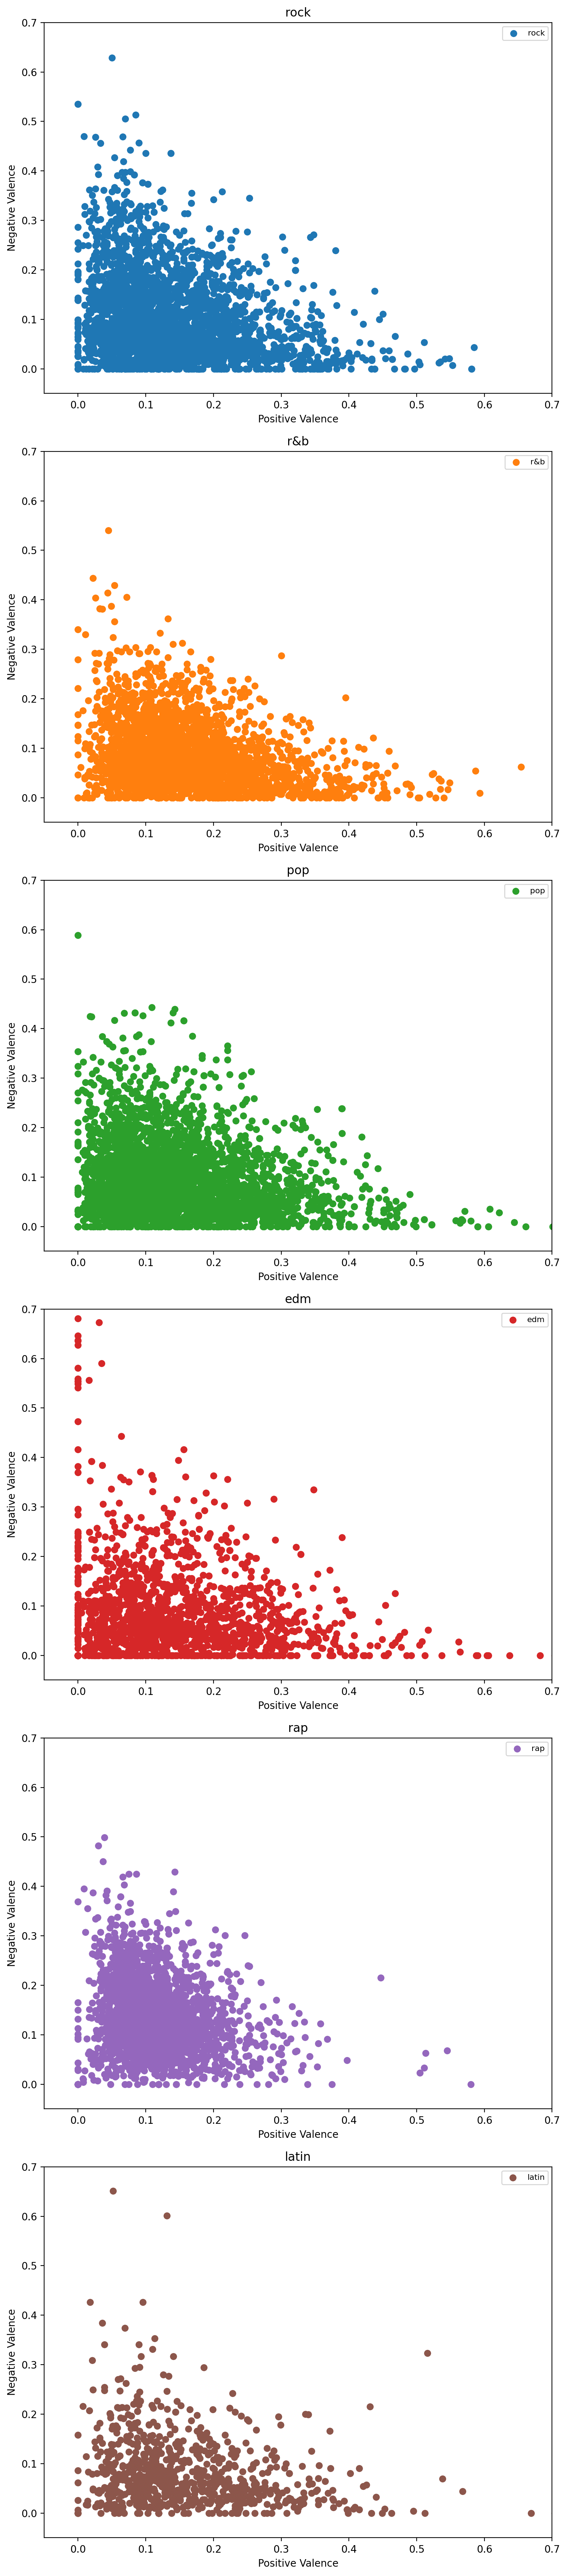

In [27]:
unique_genres = lyrics['playlist_genre'].unique()

fig, axs = plt.subplots(len(unique_genres), 1, figsize=(8, 6 * len(unique_genres)))  # Adjust the figure size as needed

# Plot each group on a separate subplot
for i, genre in enumerate(unique_genres):
    group = lyrics[lyrics['playlist_genre'] == genre]
    axs[i].scatter(group['positive'], group['negative'], label=genre, color='C'+str(i))  # Use the color palette C0, C1, ..., Cn
    axs[i].set_xlim([-0.05, 0.7])
    axs[i].set_ylim([-0.05, 0.7])
    axs[i].set_title(genre)
    axs[i].set_xlabel('Positive Valence')
    axs[i].set_ylabel('Negative Valence')
    axs[i].legend(fontsize=8)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

We can see that songs of every genre tend to have more Negative Valence. However, some generes have relatively more positive valence than others. We can see this in the number of quantity of points that are have more positive valence in each genre's plot. This is key for our analyzation techniques. However, let's also utlized the compound scores for each song in order to also give each song an emotional "mood".

The compound score in VADER is a metric that represents the overall sentiment of a piece of text. It is calculated as a sum of normalized scores of each word in the text, where each word in the text is assigned a sentiment score:

Positive words receive a positive score.
Negative words receive a negative score.
Neutral words receive a score of 0.
These individual word scores are then normalized to a range between -1 and 1.

Finally, the compound score is computed by summing these normalized scores and applying a normalization procedure.

Scores closer to 1 indicate a highly positive sentiment.
Scores closer to -1 indicate a highly negative sentiment.
Scores around 0 indicate a neutral sentiment or a mixture of positive and negative sentiments that roughly cancel each other out.
In summary, the compound score provides a single metric that encapsulates the overall sentiment of a piece of text, taking into account both positive and negative sentiments. It is particularly useful for sentiment analysis tasks where you need to quickly assess the sentiment of a large amount of text.

In [28]:
emotional_scores = lyrics[['playlist_genre', 'compound']]
emotional_scores

,playlist_genre,compound
1,rock,0.9867
2,r&b,0.9821
3,r&b,0.7591
4,pop,-0.9992
5,r&b,0.9550
...,...,...
18448,r&b,-0.9563
18449,edm,0.9217
18450,pop,-0.9990
18451,r&b,0.9864


## Let's Start Exploring Our Data!

In [29]:
x_train, x_test, y_train, y_test = train_test_split(input_data, song_genres, test_size=.25, random_state=17)

## Clustering With GMM

GMM or Gaussian Mixture Model is a probabilistic approach to assign data to a cluster. The model aims to estimate the hyperparameters: means, covariances, and coefficients to best fit the data. It maximizes the likelihood estimation.

The reason why we decided to do a GMM clustering than other approaches, such as K-Means, is because GMM is more flexible for model clusters with different variances, orientation, and shapes since it uses Gaussian Distribution to calculate covariance matrices. Unlike a K-Means model, GMM does not assume that the data is equal in variance for each cluster and dimension. Since we are dealing with songs based on several attributes, we suspect that there will be different variances between each cluster. Therefore, we decided to cluster our data with GMM. 

## Clustering With GMM

In [30]:
columns_pca = [ 'danceability',
                 'energy',
                 'loudness', 
                 'speechiness',
                 'acousticness',
                 'instrumentalness',
                 'liveness',
                 'valence',
                 'tempo', 'Major', 'Minor', 'Compound']

data_X = x_train[columns_pca]

### PCA

We decided to PCA our data to determine the ideal number of components based on the elbow method. 

Among PCA, there are other ways to reduce the dimensionality of our data like LDA. LDA is a linear transformation of the data, but it did not meet the requirements of our data as it assumes all classes have the same covariance structure.

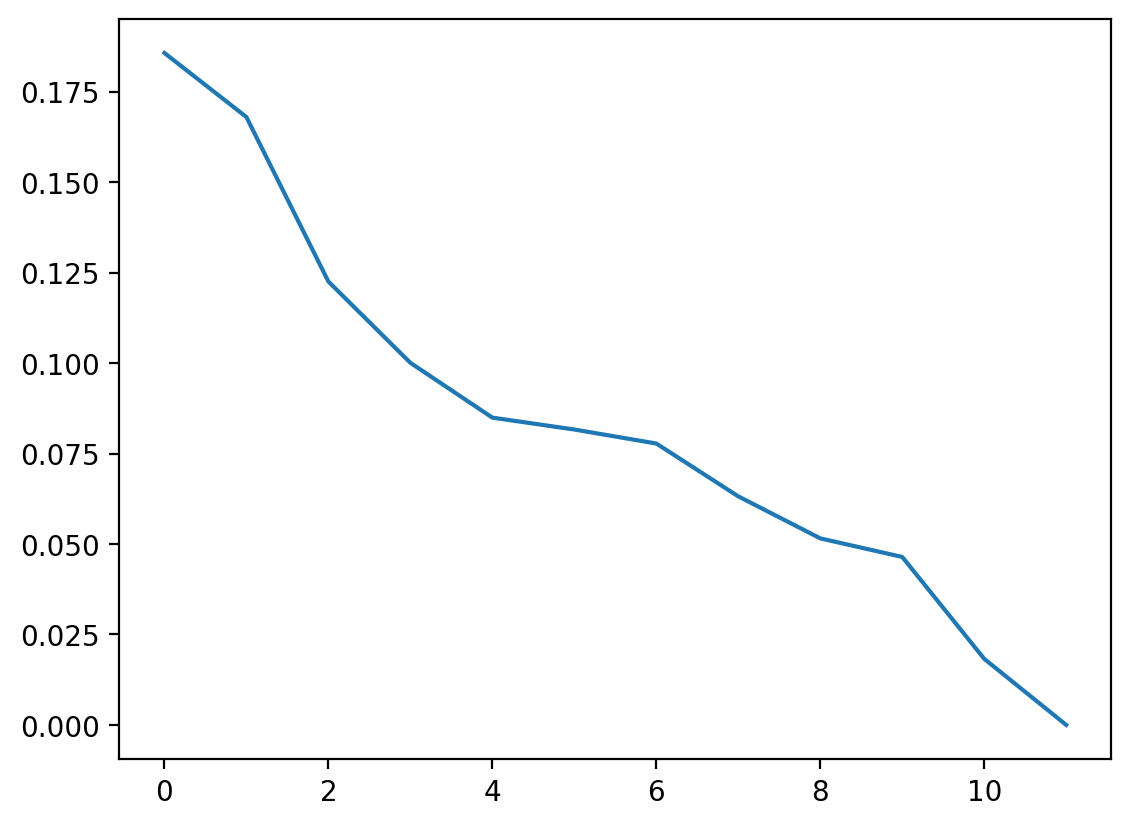

In [31]:
pca = PCA()
scaler = StandardScaler()
red = pca.fit_transform(scaler.fit_transform(data_X))
plt.plot(pca.explained_variance_ratio_);

take up to PC 9 to get to 0.95% variance explained


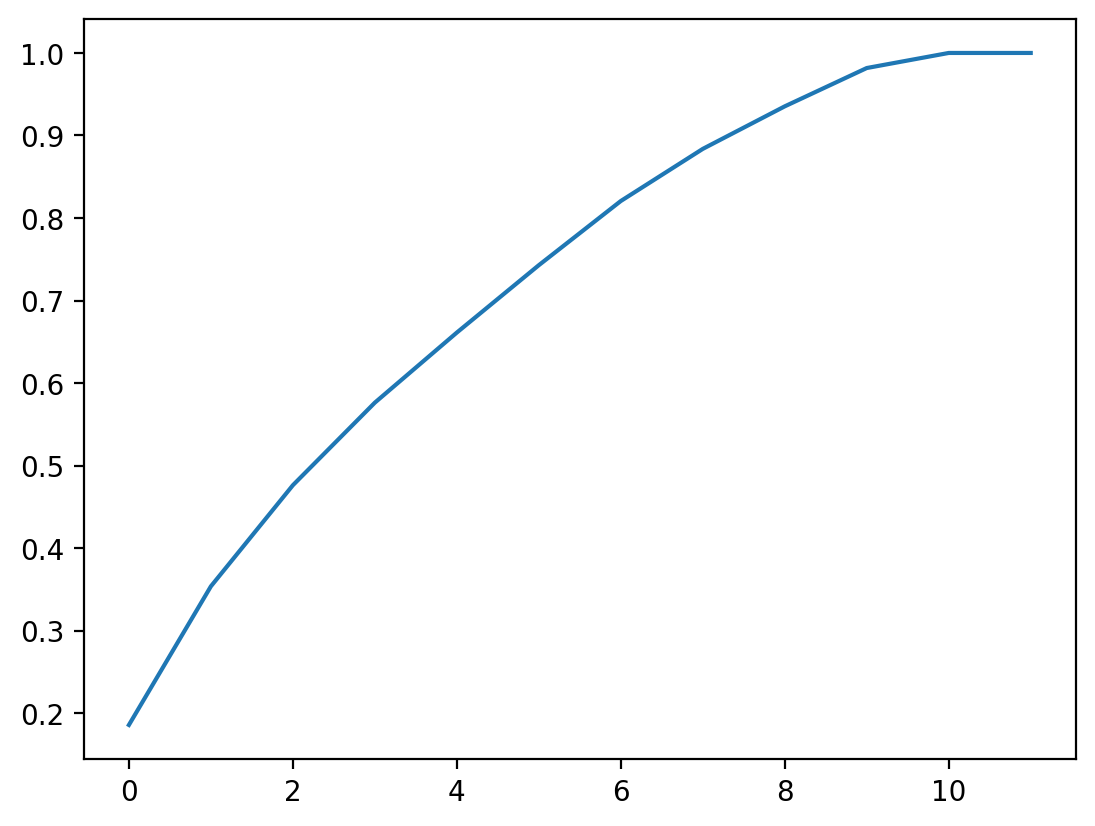

In [32]:
var_exp_thresh = 0.95
total_var_exp = np.cumsum(pca.explained_variance_ratio_)
plt.plot(total_var_exp);
pcindex = np.where(total_var_exp>=var_exp_thresh)[0]
print(f'take up to PC {pcindex[0]} to get to {var_exp_thresh}% variance explained')


To get 95% of the variance explained, we'll use 9 principal components.

Now that we haave determined the ideal number of components in our PCA as 9.

We will create a pipeline to stack operations such as scaling, PCA on our data, and clustering. With a GridSearchCV object, we want to tune the hyperparamters that would find the best combination of number of clusters and covariance structure of our GMM model. In addition with the creation of a GridSearchCV object, we want to perform cross validation to ensure our training data does leak into the testing data. We intend to generate a heatmap based on our ari score which will be explained later on.

In [33]:
ari_score = make_scorer(adjusted_rand_score)
clust = GaussianMixture()
scale = StandardScaler()

pca = PCA(n_components=9);


pipe_pca_cl = Pipeline([('scaler',scale), ('pca',pca), ('clustering', clust)])



params = {'clustering__n_components': np.arange(1,7), 
          'clustering__covariance_type': ['full', 'spherical', 'tied', 'diag']}


grid = GridSearchCV(estimator=pipe_pca_cl, 
                    param_grid=params, 
                    scoring=ari_score,  
                    verbose=3,
                    cv=3 
                   )


In [34]:
grid.fit(data_X,y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END clustering__covariance_type=full, clustering__n_components=1;, score=0.000 total time=   0.3s
[CV 2/3] END clustering__covariance_type=full, clustering__n_components=1;, score=0.000 total time=   0.1s
[CV 3/3] END clustering__covariance_type=full, clustering__n_components=1;, score=0.000 total time=   0.1s
[CV 1/3] END clustering__covariance_type=full, clustering__n_components=2;, score=0.007 total time=   0.2s
[CV 2/3] END clustering__covariance_type=full, clustering__n_components=2;, score=0.006 total time=   0.2s
[CV 3/3] END clustering__covariance_type=full, clustering__n_components=2;, score=0.007 total time=   0.2s
[CV 1/3] END clustering__covariance_type=full, clustering__n_components=3;, score=0.014 total time=   0.4s
[CV 2/3] END clustering__covariance_type=full, clustering__n_components=3;, score=0.013 total time=   0.5s
[CV 3/3] END clustering__covariance_type=full, clustering__n_components=3;, score=0

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=9)),
                                       ('clustering', GaussianMixture())]),
             param_grid={'clustering__covariance_type': ['full', 'spherical',
                                                         'tied', 'diag'],
                         'clustering__n_components': array([1, 2, 3, 4, 5, 6])},
             scoring=make_scorer(adjusted_rand_score), verbose=3)

,covariance_type,n_components,score
0,full,1,0.000000
1,full,2,0.006332
2,full,3,0.012023
3,full,4,0.017751
4,full,5,0.013138
5,full,6,0.026635
6,spherical,1,0.000000
7,spherical,2,0.008002
8,spherical,3,0.013531
9,spherical,4,0.020639


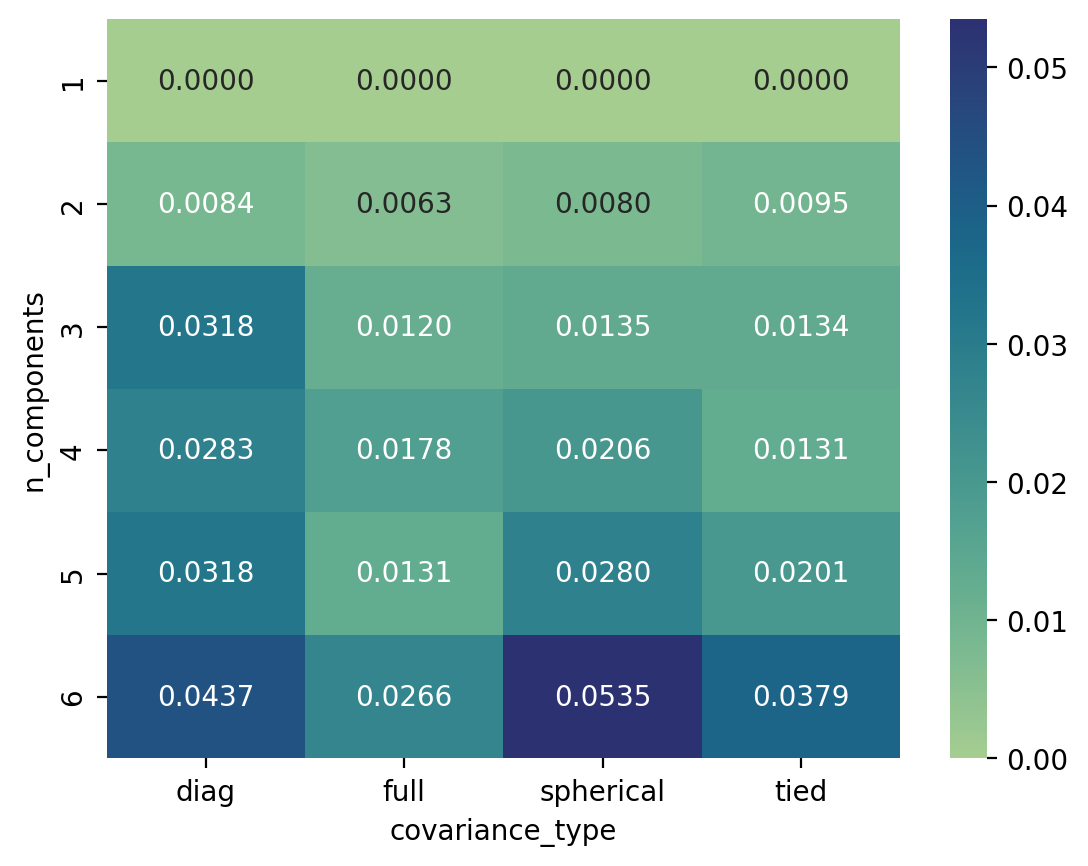

In [35]:
results = pd.DataFrame( grid.cv_results_['params'] )


results['score'] = grid.cv_results_['mean_test_score']


cols = results.columns.to_series().str.split('__').apply(lambda x: x[-1])
results.columns = cols


sns.heatmap( results.pivot(index='n_components',columns='covariance_type',values='score'),
             annot=True, fmt='5.4f', cmap="crest")

results

Based on our heatmap, we can see that the highest ari score would be at 6 GMM clusters and a spherical covariance structure!

The ari score is to evaluate the performance of our model. An ari score range is from -1 to 1. A positive score indicates that the clustering performance does better than random chance. In our case, the highest ari score is 0.0469.

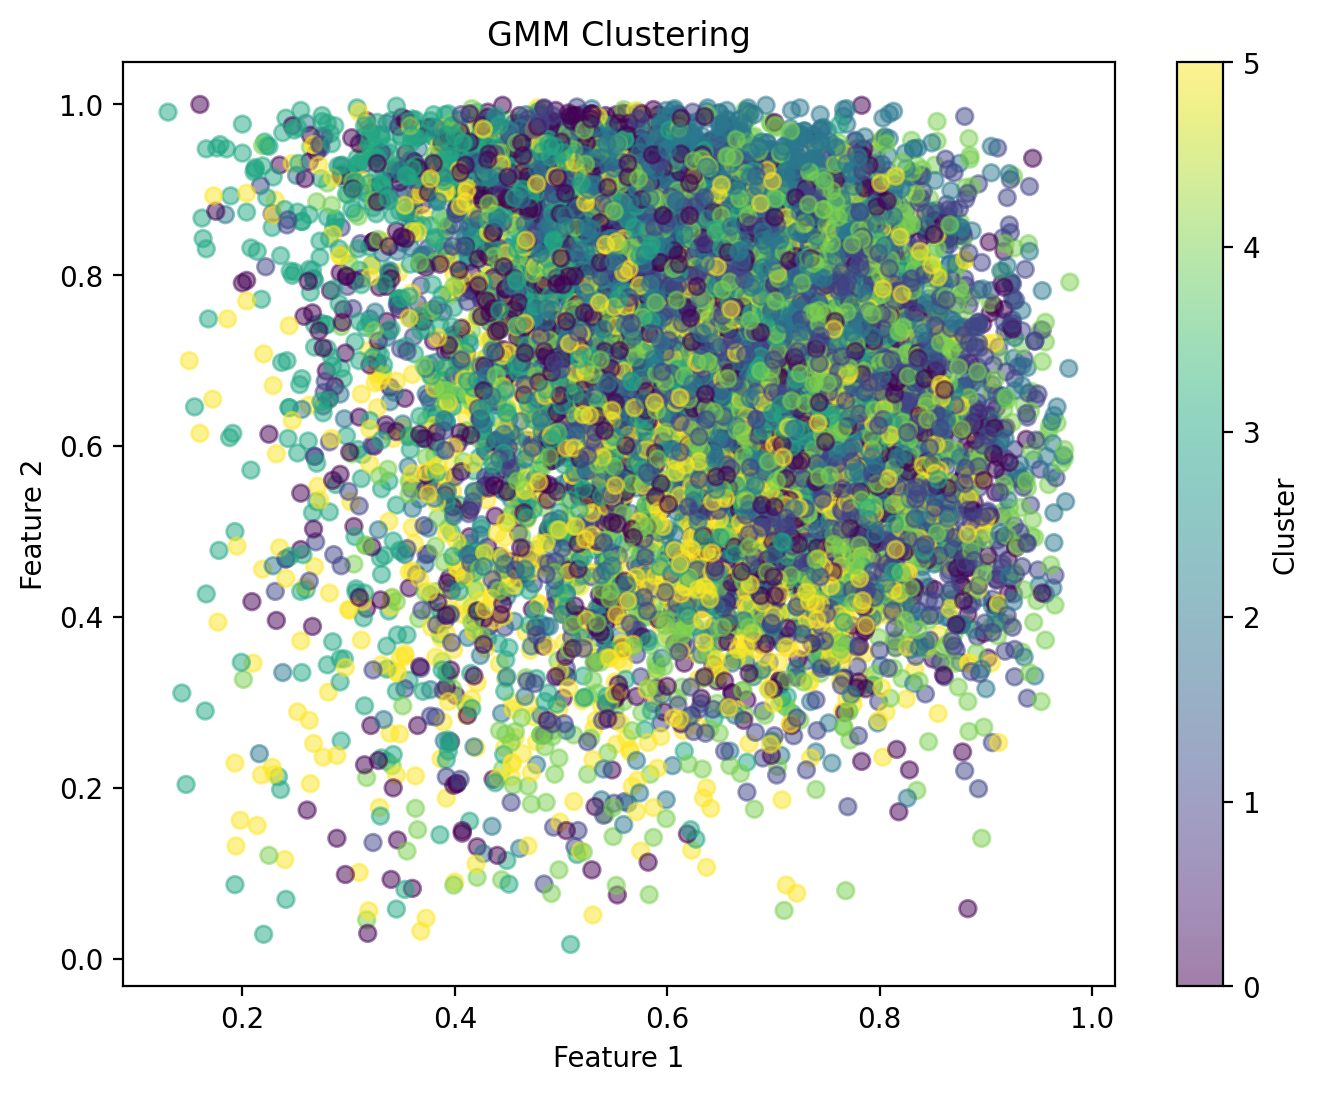

In [36]:
# Define the GMM with the best parameters
best_gmm = GaussianMixture(n_components=6, covariance_type='spherical')

# Fit the GMM to your data
best_gmm.fit(data_X)

# Predict cluster labels for your data
cluster_labels = best_gmm.predict(data_X)

# Plot the data points with cluster assignments
plt.figure(figsize=(8, 6))
plt.scatter(data_X.iloc[:, 0], data_X.iloc[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('GMM Clustering')
plt.colorbar(label='Cluster')
plt.show()

Based on this visualization of our GMM clustering, we can see the cluster datapoints overlap each other. There are no concrete clusters. 

In [37]:
from sklearn.metrics import silhouette_score
data_test_X = x_test[columns_pca]

test_pipeline = Pipeline([('pca', PCA(n_components=9)), ('gmm', GaussianMixture(n_components=6, covariance_type='spherical'))])

test_pipeline.fit(data_test_X, y_test)
y_test_pred = test_pipeline.predict(data_test_X)

silhouette = silhouette_score(data_test_X, y_test_pred)
print("Silhouette Score:", silhouette)

Silhouette Score: 0.4696729639146977


In [38]:
import random

genres = np.array(lyrics['playlist_genre'])
true_genres = lyrics['playlist_genre'].unique()
genre_nums = {true_genres[i]: i for i in range(len(true_genres))}
nums_of_genres = [genre_nums[genre] for genre in genres]

nums = [random.sample(nums_of_genres, 3) for _ in range(len(genres))]
predicted = [arr[0] for arr in nums]

gmm_pred = pd.DataFrame({'true': genres, 'pred': predicted})
gmm_rand = rand_score(gmm_pred['true'], gmm_pred['pred'])
gmm_adjusted_rand = adjusted_rand_score(gmm_pred['true'], gmm_pred['pred'])
gmm_rand, gmm_adjusted_rand



(0.6904103698538154, 0.00016886455802243768)

Our gmm_rand score or rand score indicates there is a moderate level of agreement between the true and predicted labels. Based on the gmm_adjusted_rand score or our adjusted rand score for our clustering, we can see that this number is close to 0 means that the similarity between the clusterings have little agreement based on chance. A value of 0 indicates that the clustering is not that much better than random chance.

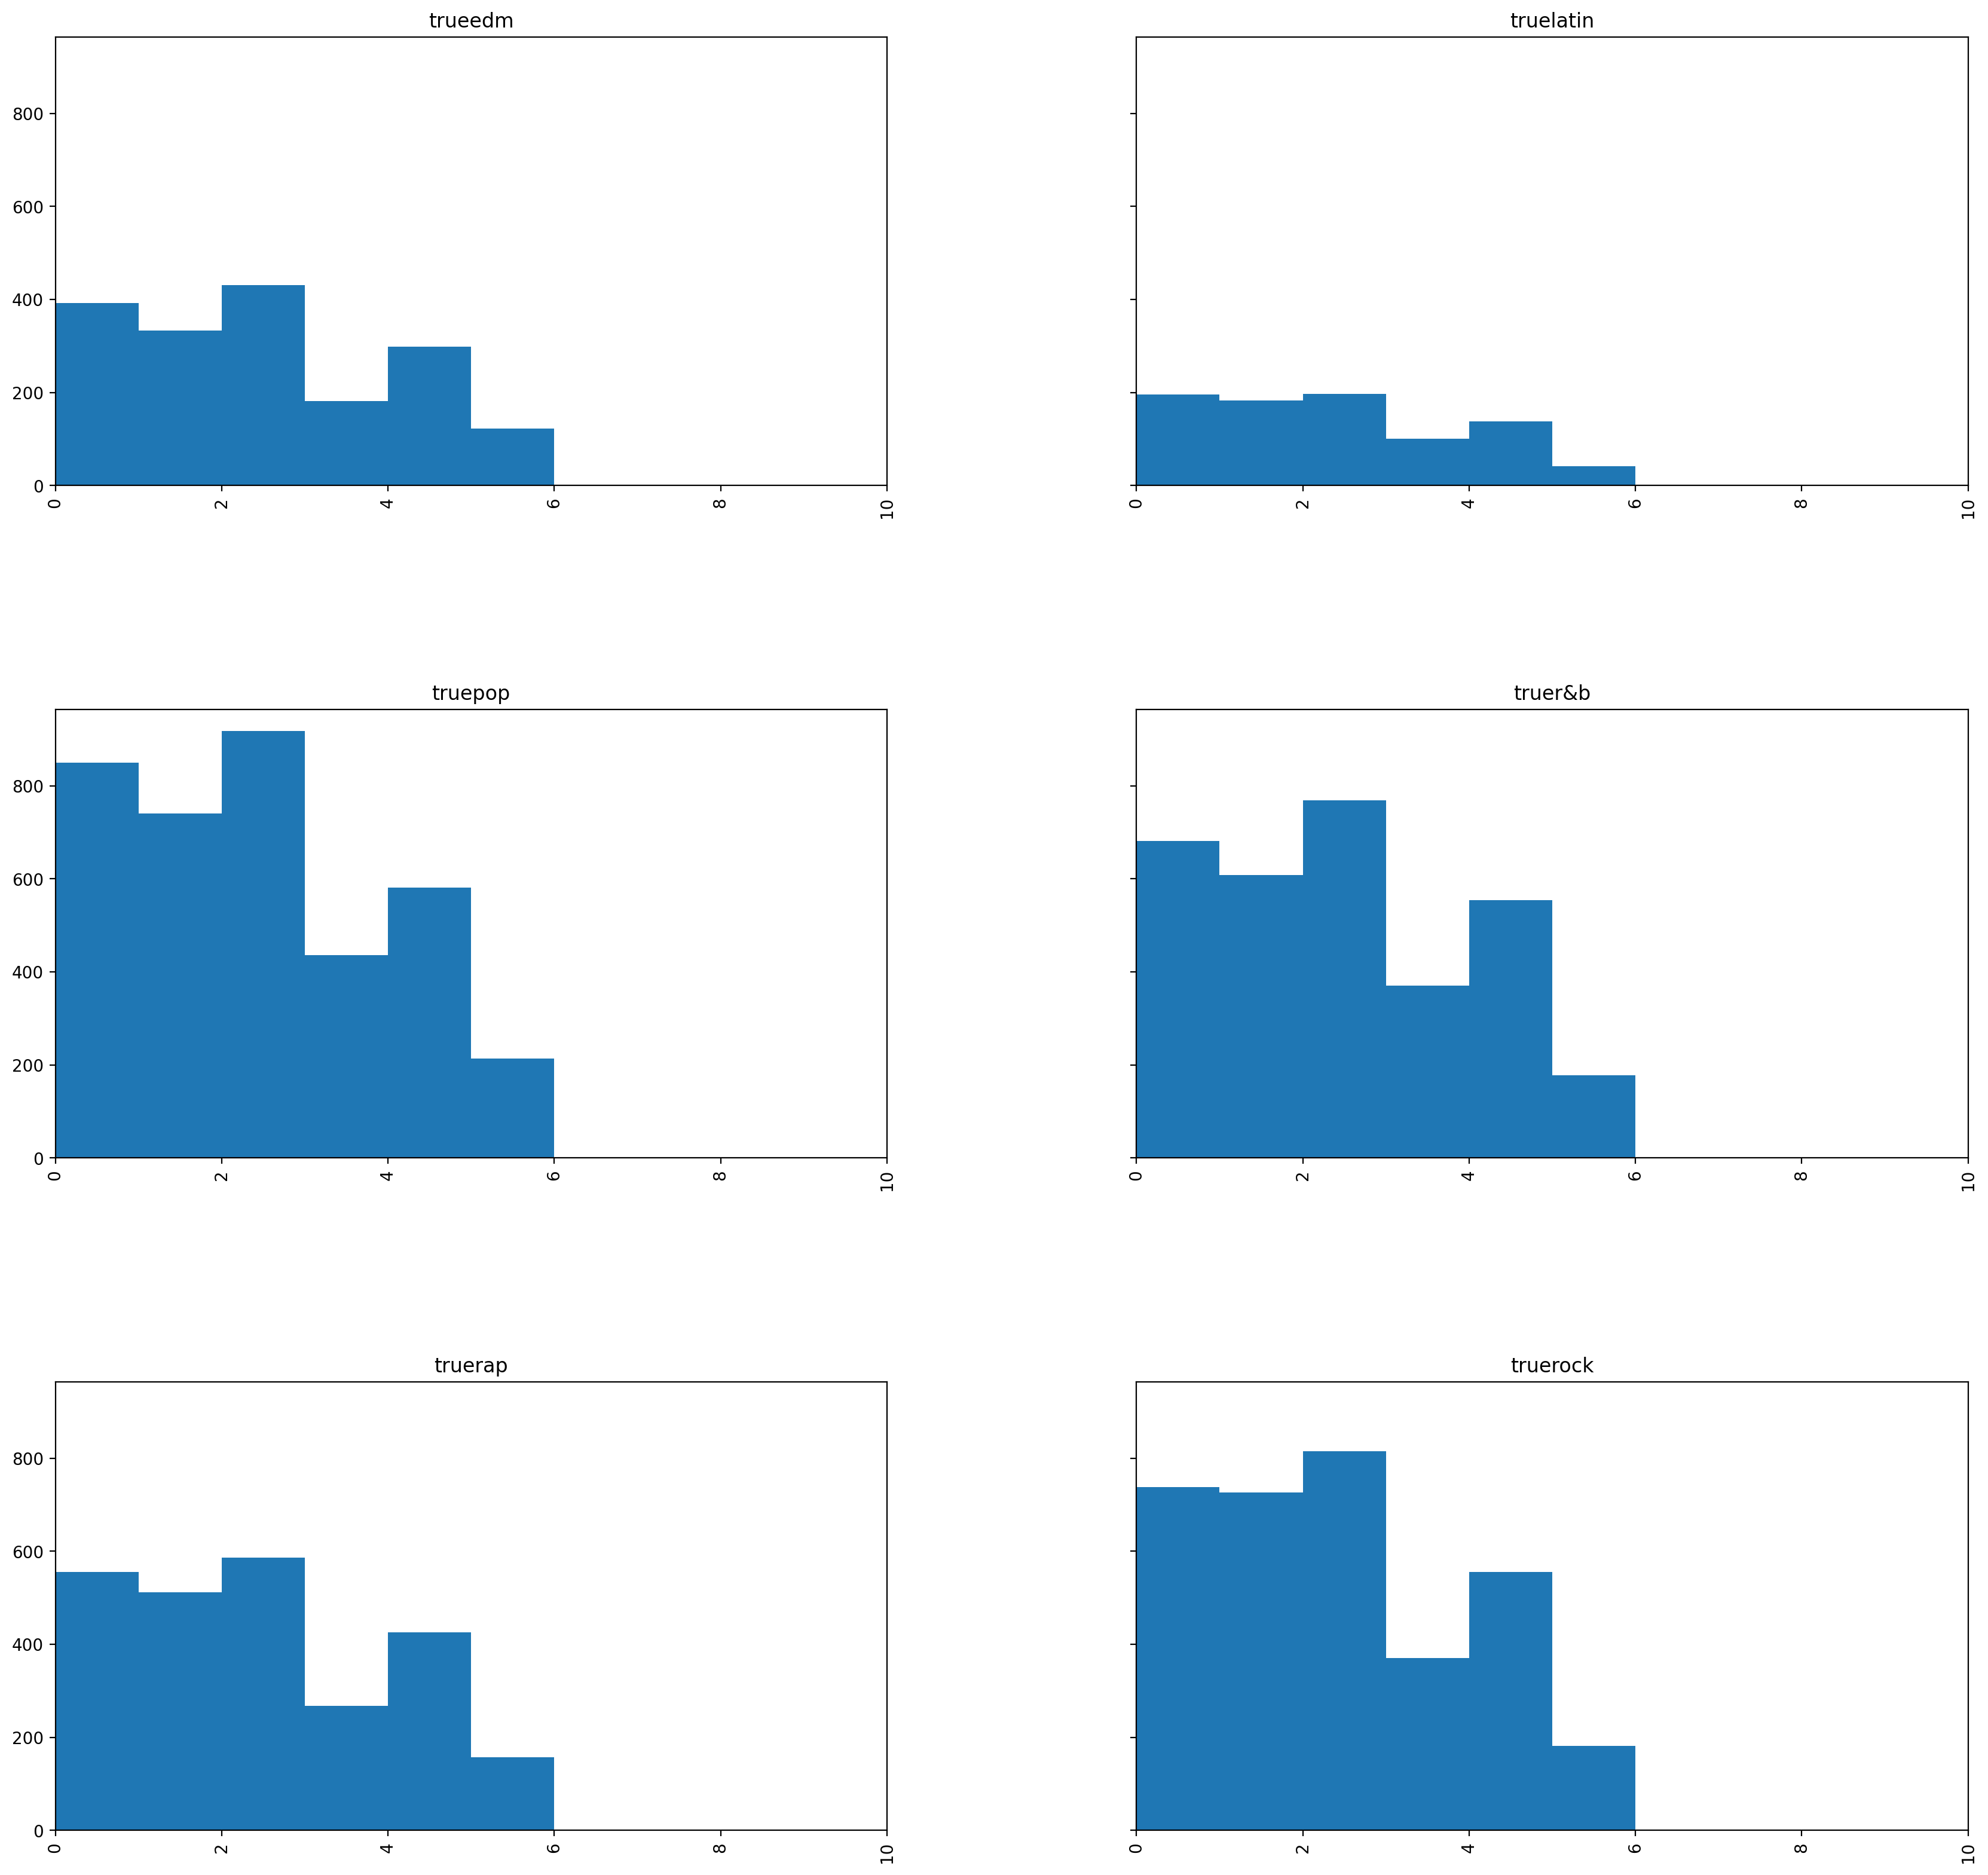

In [39]:
axs=gmm_pred.hist(column='pred', by='true', sharey=True, figsize=(20,20), bins=range(11))
for ax in axs.ravel():
    ax.set_xlim((0,10))
    old=ax.get_title()
    ax.set_title('true'+old)
    ax.set_label('pred')

Based on our silhouette score, we can tell that a positive score indicates a highly dense cluster. As we can see from the heat map of the grid search, the highest adjusted rand score is close to 0, which isn't much better than random. This may be because unsupervised clustering isn't the "best" solution to this problem. 

Let's try doing **classification** for this problem, while still using PCA.

## Classification

Let's make another pipeline to standardize, PCA, and then run a SVC model on the standardized and PCA'd data. We use a Support Vector Classifier because of the non-linear nature of the data. We'll also run a grid search using this pipeline to find the best parameters for the SVC model. We'll run different parameters for the regularization parameter and the kernel parameter.

In [38]:
from sklearn.svm import SVC

In [39]:
data_X = x_train[columns_pca]

acc_score = make_scorer(accuracy_score)

pca = PCA(n_components=9)
svc = SVC()
scaler = StandardScaler()

pipe_pca_svc = Pipeline([('scaler', scaler), ('pca', pca), ('svc', svc)])

params = {'svc__C': np.arange(1, 11),
         'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

grid = GridSearchCV(estimator=pipe_pca_svc,
                   param_grid=params,
                   scoring=acc_score,
                   verbose=3,
                   cv=5)

In [40]:
grid.fit(data_X, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END ......svc__C=1, svc__kernel=linear;, score=0.481 total time=   3.0s
[CV 2/5] END ......svc__C=1, svc__kernel=linear;, score=0.484 total time=   3.1s
[CV 3/5] END ......svc__C=1, svc__kernel=linear;, score=0.479 total time=   3.1s
[CV 4/5] END ......svc__C=1, svc__kernel=linear;, score=0.465 total time=   3.2s
[CV 5/5] END ......svc__C=1, svc__kernel=linear;, score=0.481 total time=   3.2s
[CV 1/5] END ........svc__C=1, svc__kernel=poly;, score=0.499 total time=   3.0s
[CV 2/5] END ........svc__C=1, svc__kernel=poly;, score=0.498 total time=   3.1s
[CV 3/5] END ........svc__C=1, svc__kernel=poly;, score=0.482 total time=   3.1s
[CV 4/5] END ........svc__C=1, svc__kernel=poly;, score=0.480 total time=   2.9s
[CV 5/5] END ........svc__C=1, svc__kernel=poly;, score=0.494 total time=   3.0s
[CV 1/5] END .........svc__C=1, svc__kernel=rbf;, score=0.514 total time=   3.7s
[CV 2/5] END .........svc__C=1, svc__kernel=rbf

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=9)),
                                       ('svc', SVC())]),
             param_grid={'svc__C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring=make_scorer(accuracy_score), verbose=3)

,C,kernel,score
0,1,linear,0.478057
1,1,poly,0.490694
2,1,rbf,0.515970
3,1,sigmoid,0.345537
4,2,linear,0.477797
5,2,poly,0.495109
6,2,rbf,0.517269
7,2,sigmoid,0.345798
8,3,linear,0.477710
9,3,poly,0.495714


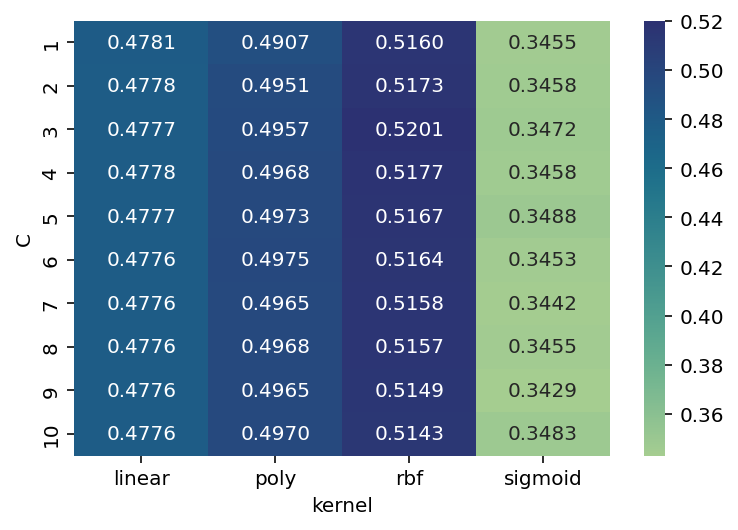

In [41]:
results = pd.DataFrame( grid.cv_results_['params'] )

results['score'] = grid.cv_results_['mean_test_score']

cols = results.columns.to_series().str.split('__').apply(lambda x: x[-1])
results.columns = cols

# plotting the results across kernel & C values
sns.heatmap( results.pivot(index='C', columns='kernel', values='score'),
             annot=True, fmt='5.4f', cmap="crest")

results

Here we can see that the best model had a value of 3 for the C parameter and it used the rbf kernel. Clearly rbf was the best kernel to use for this problem, while sigmoid was the worst. We can also validate our assumptions of this problem being non-linear because of the difference in performance between the rbf and linear kernels.

Now let's run the best model using the training set and test set.

In [42]:
best_pipeline = Pipeline([('scaler', scaler), ('pca', PCA(n_components=9)), ('svc', SVC(C=3, kernel='rbf'))])

best_pipeline.fit(data_X, y_train)
y_train_pred = best_pipeline.predict(data_X)

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         edm       0.65      0.42      0.51      1318
       latin       0.88      0.02      0.04       632
         pop       0.46      0.53      0.49      2782
         r&b       0.52      0.60      0.56      2390
         rap       0.67      0.64      0.65      1868
        rock       0.65      0.75      0.70      2563

    accuracy                           0.57     11553
   macro avg       0.64      0.49      0.49     11553
weighted avg       0.59      0.57      0.55     11553



Let's test these parameters on our test data

In [43]:
data_test_X = x_test[columns_pca]

test_pipeline = Pipeline([('scaler', scaler), ('pca', PCA(n_components=9)), ('svc', SVC(C=3, kernel='rbf'))])

test_pipeline.fit(data_test_X, y_test)
y_test_pred = test_pipeline.predict(data_test_X)

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         edm       0.66      0.49      0.56       440
       latin       1.00      0.03      0.05       225
         pop       0.49      0.65      0.56       957
         r&b       0.57      0.59      0.58       771
         rap       0.70      0.65      0.67       634
        rock       0.71      0.73      0.72       825

    accuracy                           0.60      3852
   macro avg       0.69      0.52      0.53      3852
weighted avg       0.64      0.60      0.59      3852



Curiously, the model performed better on the test set than the training set. This may be due to how we split the data up, or because the model slightly overfit the noise from the training data rather than any patterns. Either way, the accuracy hovers around 65%, which seems to be better than the GMM clustering.

Let's do the same thing, but not use PCA and then compare the outputs

In [44]:
data_X = x_train[columns_pca]

pipeline_no_pca = Pipeline([('scaler', scaler), ('svc', SVC(C=3, kernel='rbf'))])

pipeline_no_pca.fit(data_X, y_train)
no_pca_pred = pipeline_no_pca.predict(data_X)

print(classification_report(y_train, no_pca_pred))

              precision    recall  f1-score   support

         edm       0.67      0.46      0.55      1318
       latin       0.90      0.03      0.06       632
         pop       0.49      0.59      0.54      2782
         r&b       0.58      0.62      0.60      2390
         rap       0.69      0.69      0.69      1868
        rock       0.70      0.78      0.74      2563

    accuracy                           0.61     11553
   macro avg       0.67      0.53      0.53     11553
weighted avg       0.63      0.61      0.59     11553



In [45]:
data_test_X_no_pca = x_test[columns_pca]

pipeline_no_pca_test = Pipeline([('scaler', scaler), ('svc', SVC(C=3, kernel='rbf'))])

pipeline_no_pca_test.fit(data_test_X, y_test)
no_pca_test_pred = pipeline_no_pca_test.predict(data_test_X)

print(classification_report(y_test, no_pca_test_pred))

              precision    recall  f1-score   support

         edm       0.69      0.55      0.61       440
       latin       0.92      0.05      0.09       225
         pop       0.52      0.71      0.60       957
         r&b       0.65      0.63      0.64       771
         rap       0.73      0.68      0.71       634
        rock       0.75      0.79      0.77       825

    accuracy                           0.65      3852
   macro avg       0.71      0.57      0.57      3852
weighted avg       0.67      0.65      0.63      3852



We can see that the performance metrics are almost the same when using PCA and when not using PCA. The model using PCA sacrifices a little bit of accuracy from using less dimensions. However, this difference is almost negligable, so using three less dimensions is worth it.

# Discussion

### Interpreting the result

Looking at our results, we can see that the classification model performed better than the clustering model. Although the metrics used to evaluate each model aren't the same, we can compare each to what we would expect by random change or guessing. The best Adjusted Rand Score for the clustering models was near 0, which means that it did marginally better than chance. For the classification model, the average accuracies floated around 0.65, which is significantly better than chance. So, we can say with relative confidence that the classification model performed better than the clustering model did. This can be due to multiple reasons, but the most plausible one is that our problem was a better classification problem than a clustering problem. We knew which genre each song was supposed to belong to, and the data wasn't clearly separable, so a supervised model would expectedly perform better than an unsupervised model. 

Taking a deeper look at the clustering model, where we used a GMM, we can see that clearly the correct number of clusters was 6. There were 6 different song genres in our dataset, so we can infer that the model had at least some idea of what it was clustering. However, we are unable to know if it was creating the right clusters or not due to reasons which will be discussed later. We can also see that, for our test set, we had a silouhette score of around 0.47. While this score isn't amazing, it is significantly better than 0, which suggests that the clusters were decently dense and well separated. 

Looking at our classification model, which used a SVC model, we can see which kernel types were the best and worst. the RBF kernel was clearly the best kernel for our data, and the sigmoid kernel was clearly the worst. It should also be noted that the linear kernel produced relatively significantly worse results than the RBF kernel. As mentioned before, this suggests that our data is non-linear. 
Even with the SVC model, the average accuracy was only around 0.65 on our test set, which isn't very high relative to what a human might be able to get. So, while this does leave room for much improvement, We think that it provides a good starting point for any potential future analysis. We'll also note that the model run without any PCA performed marginally better than the model with PCA. This could mean that every variable in our dataset explains a significant amount of variance. However, given that our PCA-SVC model used three less components than the non-PCA model and still had nearly the same accuracy scores, this likely isn't the case.

Lastly, we want to note that by adding a sentiment analysis to the song lyrics, our team was able to provide a unique aspect to our classfications and data analysis. With the assigned sentiment scores, we were able to approximate the "mood" for each song. This allowed us to use the lyrics that were provided for each song and translate them from qualitative data to quantitative data. While this made the data easier for us to work with, we might have gotten better results if we had used the lyrics directly or interpreted the lyrics differently. Condensing the lyrics of every song into one compound score may have lost more information from the lyrics than we wanted, which may have affected our results at the end.

### Limitations

One big limitation that we had to deal with was figuring out how to label the clusters to see which cluster fit in with what genre. Although the labeling of clusters is not the job for unsupervised learning, the main purpose of our project was to see how machine learning can identify what genre a song is. This means that figuring out how to label said cluster to match a certain genre proved to be a tougher task if we did not have any classification labels like what the data had. Although clustering may not have been the best methodology to test this out, we still tried GMM to see the results. As seen from above, it seems like the GMM had the same results as picking randomly. This can be seen through the small adjusted rand index and somewhat small silhouette score. The silhouette score that we got was around 0.47 which leaves for improvement. 

Another limitation might come from the data we are using. From the GMM portion of the project, the scatterplot we made does not seem to have any distinct clusters at all. Many things could have contributed to this result. However, one explanation of this situation might be the variables we are using. Perhaps the variables that we use do not have a clear pattern that set genres apart. This would in turn give us a scatterplot where there are no distinguishable clusters. In order to get around this limitation, we might use a dataset with different variables. This would maybe contain a variable that does have a clear difference between genres and allow us to see clusters more clearly.

### Ethics & Privacy

One ethical concern that our project may run into is cultural sensitivity. This could be a concern since some songs touch upon either cultural issues or social issues. This means that the way we have to pay caution to how we label words when doing our lyrical analysis. Failure to do so can cause a mislabeling of genres or reinforcing any potential stereotypes that can unexpectingly come into play. We can try to avoid this by comparing different text sentiment data sets with each other so that we have a more generalized approach to the meaning of certain words. This would ensure that any cultural differences or social issues that could come from using only one source of word meaning would be dealt with. 

Another concern that our project might have is collection bias. This concern is more geared towards the songs we choose as if our collection is not diverse enough, then we would not know if our project is correctly doing its job in labelling songs. To combat this, we have to ensure that the songs we are choosing cover a multitude of genres to make sure that the project covers multiple genres and not a select few. 

### Conclusion

Our group found that using several characteristics of a song as well as a compound mood score extracted from its lyrics can provide a good base for separating and predicting genres. We found that clustering song data for genres is a difficult task, and perhaps not the best approach to the problem and that using a classifier, such as an SVC, might be a better option. Our analysis has provided a space to discuss the exploration of music genre classification by the use of machine learning models. While our results are insightful, we suggest exploring more aspects in the field. For example, for more improved classification, more data input such as audio features could be added to provide more genre and song insight. More data may allow for more concrete clustering and may also allow for more accurate classification.

# Footnotes
<a name ="source1"></a>[<sup>[1]</sup>](#source1note): https://us.moodmedia.com/blog/music-genres/

<a name ="source2"></a>[<sup>[2]</sup>](#source2note): Despois, J. (2016, November 21). Finding the genre of a song with Deep Learning - A.I. Odyssey part. 1. HackerNoon. https://hackernoon.com/finding-the-genre-of-a-song-with-deep-learning-da8f59a61194 

<a name ="source3"></a>[<sup>[3]</sup>](#source3note): Haggblade, M., Hong, Y., & Kao, K. (2011). Music Genre Classification.
<a name ="source4"></a>[<sup>[4]</sup>](#source4note): Boonyanit, A., & Dahl, A. (n.d.). Music genre classification by lyrics using a hierarchical ... https://web.stanford.edu/class/archive/cs/cs224n/cs224n.1174/reports/2728368.pdf 

<a name ="source5"></a>[<sup>[5]</sup>](#source5note): A. R. Rajanna, K. Aryafar, A. Shokoufandeh and R. Ptucha, "Deep Neural Networks: A Case Study for Music Genre Classification," 2015 IEEE 14th International Conference on Machine Learning and Applications (ICMLA), Miami, FL, USA, 2015, pp. 655-660, doi: 10.1109/ICMLA.2015.160. keywords: {Music;Spectrogram;Neural networks;Manifolds;Feature extraction;Support vector machines;Mel frequency cepstral coefficient},

<a name ="source6"></a>[<sup>[6]</sup>](#source6note): Akshi Kumar, Arjun Rajpal, and Dushyant Rathore. Genre classification using word embeddings and deep learning. 2018 International Conference on Advances in Computing,Communications and Informatics(ICACCI), 2018.

<a name ="source7"></a>[<sup>[7]</sup>](#source7note): https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support 